# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Fidelity Files for Bitcoin ETF as Institutional Demand Dries Up.  In a filing with the U.S. Securities and Exchange Commission (SEC), asset management firm Fidelity indicated their intention to create a Bitcoin exchange-traded fund (ETF). The Wise Origin Bitcoin ETF is the latest addition to the growing number of ETFs looking to launch crypto-based financial products in the United States. If approved, the ETF will utilise Fidelity’s in-house BTC price index alongside the firm’s Digital Assets arm. Fidelity stated that its “objective is to seek [&#8230;] ... [| Skaityti daugiau](https://bitcoinist.com/fidelity-files-for-bitcoin-etf-as-institutional-demand-dries-up/?utm_source=rss&utm_medium=rss&utm_campaign=fidelity-files-for-bitcoin-etf-as-institutional-demand-dries-up) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- AstraZeneca Releases More Data on Its Covid-19 Vaccine.  Shot was 76% effective, company says in new, more complete data release ... [| Skaityti daugiau](https://www.wsj.com/articles/astrazeneca-releases-more-data-on-its-covid-19-vaccine-11616637984?mod=hp_lead_pos2) 

### Kainų kaita pandemijos metu

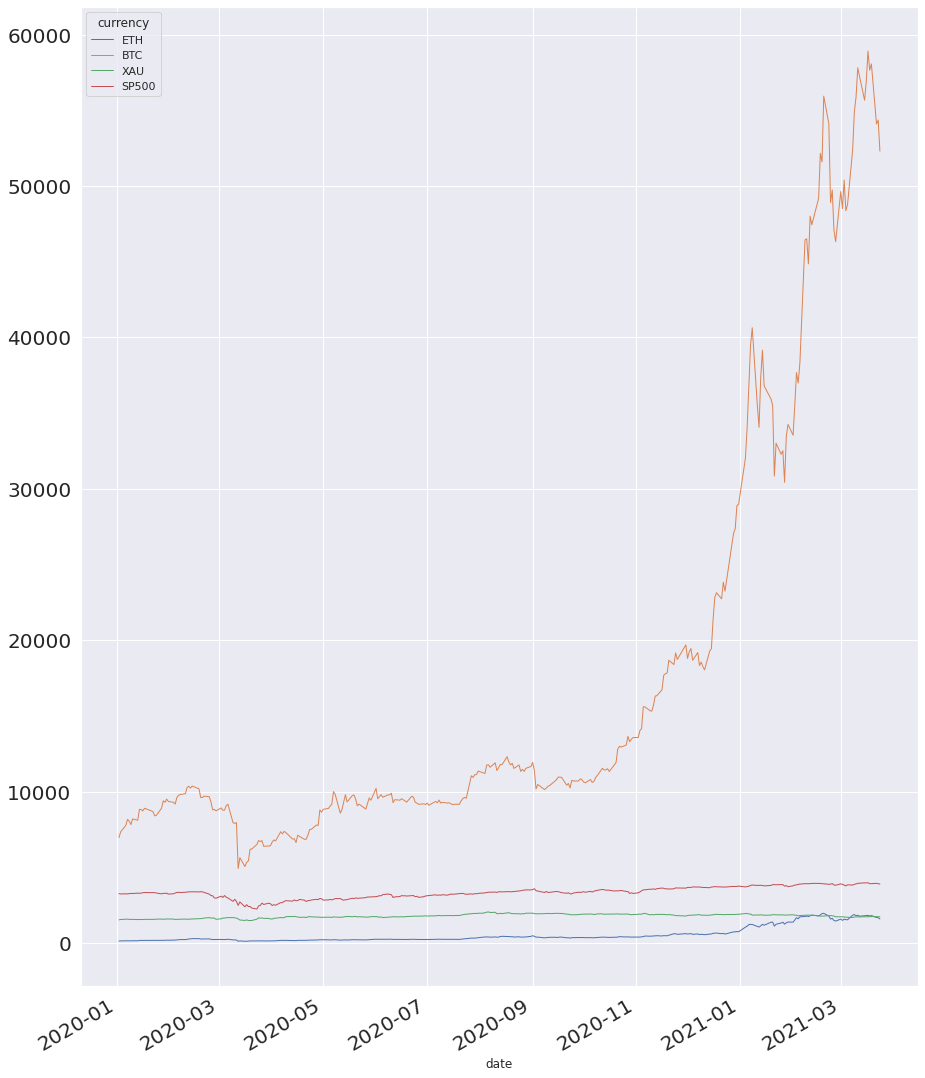

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.983930,0.215955,0.783345
BTC,0.983930,1.000000,0.158531,0.774103
XAU,0.215955,0.158531,1.000000,0.462822
SP500,0.783345,0.774103,0.462822,1.000000


In [8]:
#hide ### Koreliacijos matrica.

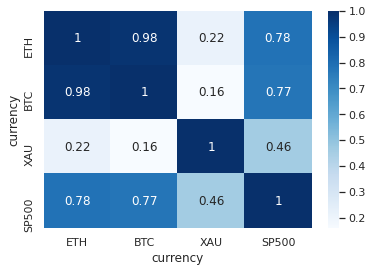

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')